In [1]:
pwd

u'C:\\Users\\A0134451N\\AppData\\Local\\Continuum\\Anaconda'

In [33]:
from __future__ import division
from linear_algebra import squared_distance, vector_mean, distance
import math, random
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

class KMeans:
    """performs k-means clustering"""

    def __init__(self, k):
        self.k = k          # number of clusters
        self.means = None   # means of clusters
        
    def classify(self, input):
        """return the index of the cluster closest to the input"""
        return min(range(self.k),
                   key=lambda i: squared_distance(input, self.means[i]))
                   
    def train(self, inputs):
    
        self.means = random.sample(inputs, self.k)
        assignments = None
        
        while True:
            # Find new assignments
            new_assignments = map(self.classify, inputs)

            # If no assignments have changed, we're done.
            if assignments == new_assignments:                
                return

            # Otherwise keep the new assignments,
            assignments = new_assignments    

            for i in range(self.k):
                i_points = [p for p, a in zip(inputs, assignments) if a == i]
                # avoid divide-by-zero if i_points is empty
                if i_points:                                
                    self.means[i] = vector_mean(i_points)    

def squared_clustering_errors(inputs, k):
    """finds the total squared error from k-means clustering the inputs"""
    clusterer = KMeans(k)
    clusterer.train(inputs)
    means = clusterer.means
    assignments = map(clusterer.classify, inputs)
    
    return sum(squared_distance(input,means[cluster])
               for input, cluster in zip(inputs, assignments))

def plot_squared_clustering_errors(plt):

    ks = range(1, len(inputs) + 1)
    errors = [squared_clustering_errors(inputs, k) for k in ks]

    plt.plot(ks, errors)
    plt.xticks(ks)
    plt.xlabel("k")
    plt.ylabel("total squared error")
    plt.show()

#
# using clustering to recolor an image
#

def recolor_image(input_file, k=5):

    img = mpimg.imread(path_to_png_file)
    pixels = [pixel for row in img for pixel in row]
    clusterer = KMeans(k)
    clusterer.train(pixels) # this might take a while    

    def recolor(pixel):
        cluster = clusterer.classify(pixel) # index of the closest cluster
        return clusterer.means[cluster]     # mean of the closest cluster

    new_img = [[recolor(pixel) for pixel in row]
               for row in img]

    plt.imshow(new_img)
    plt.axis('off')
    plt.show()

#
# hierarchical clustering
#

def is_leaf(cluster):
    """a cluster is a leaf if it has length 1"""
    return len(cluster) == 1

def get_children(cluster):
    """returns the two children of this cluster if it's a merged cluster;
    raises an exception if this is a leaf cluster"""
    if is_leaf(cluster):
        raise TypeError("a leaf cluster has no children")
    else:
        return cluster[1]

def get_values(cluster):
    """returns the value in this cluster (if it's a leaf cluster)
    or all the values in the leaf clusters below it (if it's not)"""
    if is_leaf(cluster):
        return cluster # is already a 1-tuple containing value
    else:
        return [value
                for child in get_children(cluster)
                for value in get_values(child)]

def cluster_distance(cluster1, cluster2, distance_agg=min):
    """finds the aggregate distance between elements of cluster1
    and elements of cluster2"""
    return distance_agg([distance(input1, input2)
                        for input1 in get_values(cluster1)
                        for input2 in get_values(cluster2)])

def get_merge_order(cluster):
    if is_leaf(cluster):
        return float('inf')
    else:
        return cluster[0] # merge_order is first element of 2-tuple

def bottom_up_cluster(inputs, distance_agg=min):
    # start with every input a leaf cluster / 1-tuple
    clusters = [(input,) for input in inputs]
    
    # as long as we have more than one cluster left...
    while len(clusters) > 1:
        # find the two closest clusters
        c1, c2 = min([(cluster1, cluster2)
                     for i, cluster1 in enumerate(clusters)
                     for cluster2 in clusters[:i]],
                     key=lambda (x, y): cluster_distance(x, y, distance_agg))

        # remove them from the list of clusters
        import numpy
        clusters = [c for c in clusters if numpy.all(c != c1) and numpy.all(c != c2)]

        # merge them, using merge_order = # of clusters left
        merged_cluster = (len(clusters), [c1, c2])

        # and add their merge
        clusters.append(merged_cluster)

    # when there's only one cluster left, return it
    return clusters[0]

def generate_clusters(base_cluster, num_clusters):
    # start with a list with just the base cluster
    clusters = [base_cluster]
    
    # as long as we don't have enough clusters yet...
    while len(clusters) < num_clusters:
        # choose the last-merged of our clusters
        next_cluster = min(clusters, key=get_merge_order)
        # remove it from the list

In [2]:
import pandas as pd
from sklearn import preprocessing

In [3]:
df=pd.read_csv("Final_working.csv")

In [7]:
df1=df.drop('id',axis=1)

In [8]:
inputs=df1.values

In [9]:
inputs_scaled=preprocessing.scale(inputs)

In [11]:
print "errors as a function of k"
for k in range(1, 20):
    print k, squared_clustering_errors(inputs_scaled, k)
print


 errors as a function of k
1 1569800.0
2 1489676.80111
3 1454781.60955
4 1429966.46822
5 1407096.81697
6 1386895.6391
7 1369107.96355
8 1353792.26602
9 1341740.61713
10 1313165.37905
11 1294350.13243
12 1270212.66825
13 1259804.54995
14 1248989.5135
15 1224649.56335
16 1216973.35575
17 1207633.89837
18 1172499.06477
19 1177130.06563



In [12]:
errors=[[1, 1569800.0]
,[2 ,1489676.80111]
,[3 ,1454781.60955]
,[4, 1429966.46822]
,[5, 1407096.81697]
,[6, 1386895.6391]
,[7, 1369107.96355]
,[8, 1353792.26602]
,[9, 1341740.61713]
,[10, 1313165.37905]
,[11, 1294350.13243]
,[12, 1270212.66825]
,[13, 1259804.54995]
,[14, 1248989.5135]
,[15, 1224649.56335]
,[16, 1216973.35575]
,[17, 1207633.89837]
,[18, 1172499.06477]
,[19, 1177130.06563]]


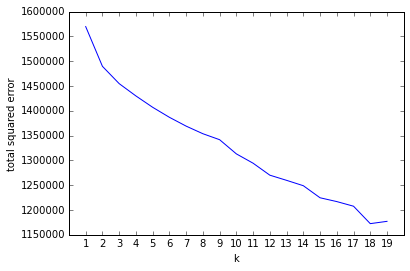

In [32]:
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
y=[1569800,
1489676.801,
1454781.61,
1429966.468,
1407096.817,
1386895.639,
1369107.964,
1353792.266,
1341740.617,
1313165.379,
1294350.132,
1270212.668,
1259804.55,
1248989.514,
1224649.563,
1216973.356,
1207633.898,
1172499.065,
1177130.066]

%matplotlib inline
plt.plot(x,y)
plt.xticks(x)
plt.xlabel("k")
plt.ylabel("total squared error")
plt.show()

In [20]:
import numpy as np

In [37]:
from sklearn.cluster import KMeans

In [38]:
help(KMeans)

Help on class KMeans in module sklearn.cluster.k_means_:

class KMeans(sklearn.base.BaseEstimator, sklearn.base.ClusterMixin, sklearn.base.TransformerMixin)
 |  K-Means clustering
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, optional, default: 8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  max_iter : int, default: 300
 |      Maximum number of iterations of the k-means algorithm for a
 |      single run.
 |  
 |  n_init : int, default: 10
 |      Number of time the k-means algorithm will be run with different
 |      centroid seeds. The final results will be the best output of
 |      n_init consecutive runs in terms of inertia.
 |  
 |  init : {'k-means++', 'random' or an ndarray}
 |      Method for initialization, defaults to 'k-means++':
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more

In [40]:
num_clusters = 11
km1 = KMeans(n_clusters=num_clusters, random_state=23)

In [41]:
%time km1.fit(inputs_scaled)

Wall time: 4.77 s


KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=11, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=23, tol=0.0001,
    verbose=0)

In [42]:
clusters1 = km1.labels_.tolist()

In [44]:
clusters1

[4,
 10,
 10,
 4,
 3,
 4,
 4,
 10,
 10,
 10,
 2,
 10,
 10,
 2,
 0,
 10,
 2,
 4,
 10,
 4,
 10,
 4,
 10,
 4,
 10,
 4,
 2,
 7,
 10,
 4,
 4,
 10,
 2,
 4,
 10,
 10,
 4,
 10,
 4,
 4,
 10,
 3,
 4,
 10,
 10,
 4,
 10,
 10,
 10,
 4,
 4,
 4,
 10,
 2,
 10,
 4,
 10,
 10,
 10,
 10,
 10,
 10,
 4,
 10,
 2,
 10,
 10,
 4,
 4,
 4,
 4,
 10,
 10,
 10,
 4,
 1,
 4,
 4,
 10,
 10,
 2,
 10,
 4,
 4,
 4,
 10,
 10,
 10,
 4,
 3,
 4,
 4,
 10,
 10,
 4,
 10,
 10,
 4,
 10,
 4,
 10,
 4,
 10,
 10,
 4,
 4,
 10,
 4,
 10,
 10,
 4,
 10,
 10,
 4,
 10,
 4,
 10,
 4,
 4,
 1,
 4,
 10,
 1,
 4,
 4,
 4,
 10,
 4,
 10,
 2,
 10,
 4,
 10,
 4,
 10,
 10,
 10,
 4,
 4,
 10,
 10,
 2,
 4,
 10,
 4,
 10,
 4,
 10,
 4,
 4,
 2,
 10,
 4,
 4,
 10,
 10,
 10,
 10,
 10,
 4,
 4,
 10,
 10,
 10,
 2,
 10,
 4,
 10,
 10,
 10,
 4,
 4,
 10,
 10,
 10,
 10,
 10,
 4,
 4,
 10,
 4,
 4,
 10,
 10,
 3,
 10,
 4,
 10,
 4,
 4,
 1,
 10,
 4,
 10,
 10,
 4,
 10,
 4,
 2,
 4,
 10,
 10,
 4,
 4,
 4,
 10,
 4,
 10,
 4,
 10,
 4,
 4,
 7,
 10,
 10,
 0,
 2,
 4,
 4,
 0,
 10,
 4,
 10,
 

In [47]:
array1 = np.array(clusters1)
silhouette_score(inputs_scaled, array1, metric='euclidean', sample_size=None, random_state=None)

c:\users\a0134451n\appdata\local\continuum\anaconda\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


0.18498763454632486

In [46]:
from sklearn.metrics import silhouette_score

In [48]:
km1.cluster_centers_

array([[  3.02746252e-01,  -7.95799693e-02,   7.39664768e-01, ...,
         -3.35854575e-01,   4.60314858e-01,   3.05461499e-03],
       [  2.84374758e-02,   6.52158509e-02,   5.43218013e-01, ...,
         -1.34149431e+00,   4.31084536e-01,  -6.00105036e-03],
       [  1.31745702e-02,  -3.39860385e-02,   4.57500739e-01, ...,
         -2.94284184e-01,   4.03009248e-01,  -4.87458696e-02],
       ..., 
       [  1.34778132e-01,  -3.50608043e-01,   1.26392656e+00, ...,
          2.92292706e-01,   2.07039835e-01,  -4.23627029e-01],
       [ -8.22883618e-02,  -9.74343884e-01,   3.52412214e+00, ...,
          2.92292706e-01,   6.59701579e-01,  -9.60574716e-01],
       [ -3.75360165e-02,   2.48173757e-02,  -1.05870580e-02, ...,
         -4.13113947e-01,   3.15230966e-01,   3.99664159e-02]])

In [49]:
df['Cluster']=km1.labels_

In [51]:
df['Cluster']

0         4
1        10
2        10
3         4
4         3
5         4
6         4
7        10
8        10
9        10
10        2
11       10
12       10
13        2
14        0
15       10
16        2
17        4
18       10
19        4
20       10
21        4
22       10
23        4
24       10
25        4
26        2
27        7
28       10
29        4
         ..
15668     4
15669     4
15670     4
15671     4
15672     4
15673     4
15674     4
15675     4
15676     4
15677     4
15678     4
15679     4
15680     4
15681     4
15682     4
15683     4
15684     4
15685     4
15686     4
15687     4
15688     4
15689     4
15690     4
15691     4
15692     4
15693     4
15694     4
15695     4
15696     4
15697     4
Name: Cluster, dtype: int32

In [53]:
df.to_csv('Cluster_Final.csv')

In [54]:
num_clusters = 6
km2 = KMeans(n_clusters=num_clusters, random_state=23)

In [55]:
%time km2.fit(inputs_scaled)

Wall time: 2.36 s


KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=6, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=23, tol=0.0001,
    verbose=0)

In [60]:
import pandas
clusters2 = km2.labels_.tolist()
ps = pandas.Series([i for i in clusters2])
counts = ps.value_counts()
print counts

3    10210
0     4069
1      831
2      560
5       27
4        1
dtype: int64
